# INTRODUCTION ;



In this project, we aim to provide actionable insights for a business stakeholder looking to mitigate risks in a new business venture. By leveraging skills in data cleaning, imputation, analysis, and visualization, we will generate data-driven insights to guide decision-making in the aviation industry. The goal is to determine which aircraft present the lowest risk for purchase and operation, thereby supporting the company's strategic diversification efforts.


## BUSINESS PROBLEM ;

As part of its diversification strategy, the company is exploring new industries to expand its portfolio. Currently, the focus is on entering the aviation industry, specifically in purchasing and operating aircraft for both commercial and private enterprises. The critical business problem is to identify the aircraft that pose the lowest risk, enabling the company to make informed decisions in this new market segment.

## BUSINESS UNDERSTANDING

### Main Objective


 
Which aircraft present the lowest risk for purchase and operation, thereby supporting the company's strategic diversification efforts?


### Specific Objectives

 1. Which Aircraft is less vulnerable to accidents?
 2. Which Aircraft to be used for commercial enterprise and which to be used for private enterprises?


## DATA UNDERSTANDING:

In this project we shall work with a dataset from Kaggle obtained by the National Transportation Safety Board, which contains Aviation accident data from 1962 -2023.

## Data & Libraries Importation


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

### Loading the data

To import the dataset from the CSV file and store it in a variable df

In [2]:
df = pd.read_csv('C:/Users/ADMIN/Documents/Moringa/Phase1/Project1/First-Project/Aviation Data/AviationData.csv', encoding='ISO-8859-1', low_memory=False)
df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


 #  Data Wrangling

In [3]:
#Checking duplicated values
df.duplicated().value_counts()

False    88889
Name: count, dtype: int64

In [4]:
df.shape

(88889, 31)

The dataset has 88,889 records and 31 columns.

In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#dropping of unnecessary columns for our analysis
df.drop(labels = ['Investigation.Type','Accident.Number', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
                  'Airport.Name', 'Injury.Severity','Amateur.Built','FAR.Description','Air.carrier', 'Total.Fatal.Injuries',
                  'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Publication.Date',
                  'Schedule',],inplace = True , axis = 1)

In [7]:
df.columns
df.shape

(88889, 13)

In [8]:
#checking of missing values
df.isna().sum()

Event.Id                     0
Event.Date                   0
Aircraft.damage           3194
Aircraft.Category        56602
Registration.Number       1382
Make                        63
Model                       92
Number.of.Engines         6084
Engine.Type               7096
Purpose.of.flight         6192
Weather.Condition         4492
Broad.phase.of.flight    27165
Report.Status             6384
dtype: int64

## Identifying the unique values

In [9]:
df['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [10]:
df['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [11]:
df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [12]:
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [13]:
df['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [14]:
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [15]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [16]:
df['Report.Status'].unique()

array(['Probable Cause', 'Factual', 'Foreign', ...,
       'The pilot did not ensure adequate clearance from construction vehicles during taxi.',
       'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.',
       'The pilot\x92s loss of control due to a wind gust during landing.'],
      dtype=object)

## Dealing with Duplicates

In [17]:
#checking for duplicates and visually inspecting them
df[df.duplicated(keep =False)]

,Event.Id,Event.Date,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Report.Status


 After a visual exploration a decision of dropping the duplicate values was relevant

In [18]:
# Dropping duplicate values
df = df.drop_duplicates()

In [19]:
df.shape

(88889, 13)

## Dealing with missing values

In [20]:
df.isna().sum()

Event.Id                     0
Event.Date                   0
Aircraft.damage           3194
Aircraft.Category        56602
Registration.Number       1382
Make                        63
Model                       92
Number.of.Engines         6084
Engine.Type               7096
Purpose.of.flight         6192
Weather.Condition         4492
Broad.phase.of.flight    27165
Report.Status             6384
dtype: int64

In [21]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

In [22]:
df.fillna({'Aircraft.damage': 'Unknown'}, inplace=True)

In [23]:
df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', 'Unknown'], dtype=object)

In [24]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64148
Destroyed      18623
Unknown         3313
Minor           2805
Name: count, dtype: int64

In [25]:
# Simplify 'Report.Status'
df['Report.Status'] = df['Report.Status'].apply(lambda x: 'Other' if isinstance(x, str) and len(x) > 20 else x)

In [26]:
df.fillna({'Report.Status': 'Unknown'}, inplace=True)

In [27]:
df['Report.Status'].value_counts()

Report.Status
Probable Cause          61754
Other                   18380
Unknown                  6384
Foreign                  1999
<br /><br />              167
Factual                   145
None.                      17
.                          16
Preliminary                15
Undetermined.               6
;kh                         1
X                           1
a                           1
NONE.                       1
Not required for RA.        1
A bird strike.              1
Name: count, dtype: int64

In [28]:
# Standardize 'Weather.Condition' values
df['Weather.Condition'] = df['Weather.Condition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'})

In [29]:
df.fillna({'Weather.Condition': 'Unknown'}, inplace=True)

In [30]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC        77303
IMC         5976
Unknown     5610
Name: count, dtype: int64

In [31]:
df.isna().sum()

Event.Id                     0
Event.Date                   0
Aircraft.damage              0
Aircraft.Category        56602
Registration.Number       1382
Make                        63
Model                       92
Number.of.Engines         6084
Engine.Type               7096
Purpose.of.flight         6192
Weather.Condition            0
Broad.phase.of.flight    27165
Report.Status                0
dtype: int64

In [32]:
# Standardize 'Make' and 'Model'
df['Make'] = df['Make'].str.strip().str.lower().fillna('unknown')
df['Model'] = df['Model'].str.strip().str.lower().fillna('unknown')


In [33]:
df.isna().sum()

Event.Id                     0
Event.Date                   0
Aircraft.damage              0
Aircraft.Category        56602
Registration.Number       1382
Make                         0
Model                        0
Number.of.Engines         6084
Engine.Type               7096
Purpose.of.flight         6192
Weather.Condition            0
Broad.phase.of.flight    27165
Report.Status                0
dtype: int64

In [34]:
# Standardize 'Purpose.of.flight'
df['Purpose.of.flight'] = df['Purpose.of.flight'].replace({
    'Public Aircraft': 'Public Aircraft - Other',
    'Public Aircraft - Federal': 'Public Aircraft - Other',
    'Public Aircraft - State': 'Public Aircraft - Other',
    'Public Aircraft - Local': 'Public Aircraft - Other',
    'Air Race/show': 'Air Race Show',
    'Air Race show': 'Air Race Show'
}).fillna('Unknown').str.strip().str.lower()


In [35]:
# Standardize 'Aircraft.damage'
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown').str.strip().str.lower()


In [36]:
df.isna().sum()

Event.Id                     0
Event.Date                   0
Aircraft.damage              0
Aircraft.Category        56602
Registration.Number       1382
Make                         0
Model                        0
Number.of.Engines         6084
Engine.Type               7096
Purpose.of.flight            0
Weather.Condition            0
Broad.phase.of.flight    27165
Report.Status                0
dtype: int64

In [37]:
df.fillna({'Aircraft.Category': 'Unknown'}, inplace=True)

In [38]:
df.fillna({'Broad.phase.of.flight': 'Unknown'}, inplace=True)

In [39]:
df.isna().sum()

Event.Id                    0
Event.Date                  0
Aircraft.damage             0
Aircraft.Category           0
Registration.Number      1382
Make                        0
Model                       0
Number.of.Engines        6084
Engine.Type              7096
Purpose.of.flight           0
Weather.Condition           0
Broad.phase.of.flight       0
Report.Status               0
dtype: int64

In [40]:
df.fillna({'Engine.Type': 'Unknown'},inplace = True)
df.fillna({'Number.of.Engines': df['Number.of.Engines'].mean() }, inplace=True)

In [41]:
df.isna().sum()

Event.Id                    0
Event.Date                  0
Aircraft.damage             0
Aircraft.Category           0
Registration.Number      1382
Make                        0
Model                       0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Weather.Condition           0
Broad.phase.of.flight       0
Report.Status               0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df[df.duplicated(keep =False)]

,Event.Id,Event.Date,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Report.Status


In [44]:
df = df.drop_duplicates()

In [45]:
df.duplicated().sum()

0

In [48]:
df['Registration.Number'].value_counts()

Registration.Number
NONE      344
UNREG     126
UNK        13
USAF        9
N20752      8
         ... 
N93478      1
N519UA      1
N8840W      1
N21040      1
N9026P      1
Name: count, Length: 79104, dtype: int64

In [50]:
df['Event.Id'].value_counts()

Event.Id
20001212X19172    3
20001214X45071    3
20220730105623    2
20051213X01965    2
20001212X16765    2
                 ..
20001211X14216    1
20001211X14239    1
20001211X14207    1
20001211X14204    1
20221230106513    1
Name: count, Length: 87951, dtype: int64

In [51]:
df.duplicated().sum()

0

In [53]:
df.fillna({'Registration.Number': 'Unknown'},inplace = True)

In [54]:
df.isna().sum()

Event.Id                 0
Event.Date               0
Aircraft.damage          0
Aircraft.Category        0
Registration.Number      0
Make                     0
Model                    0
Number.of.Engines        0
Engine.Type              0
Purpose.of.flight        0
Weather.Condition        0
Broad.phase.of.flight    0
Report.Status            0
dtype: int64

At this point the data has no missing value

## Summary of cleaned dataframe

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Id               88889 non-null  object 
 1   Event.Date             88889 non-null  object 
 2   Aircraft.damage        88889 non-null  object 
 3   Aircraft.Category      88889 non-null  object 
 4   Registration.Number    88889 non-null  object 
 5   Make                   88889 non-null  object 
 6   Model                  88889 non-null  object 
 7   Number.of.Engines      88889 non-null  float64
 8   Engine.Type            88889 non-null  object 
 9   Purpose.of.flight      88889 non-null  object 
 10  Weather.Condition      88889 non-null  object 
 11  Broad.phase.of.flight  88889 non-null  object 
 12  Report.Status          88889 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.8+ MB


In [56]:
df.describe()

,Number.of.Engines
count,88889.000000
mean,1.146585
std,0.430959
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


# Initial Exploratory Data Analysis

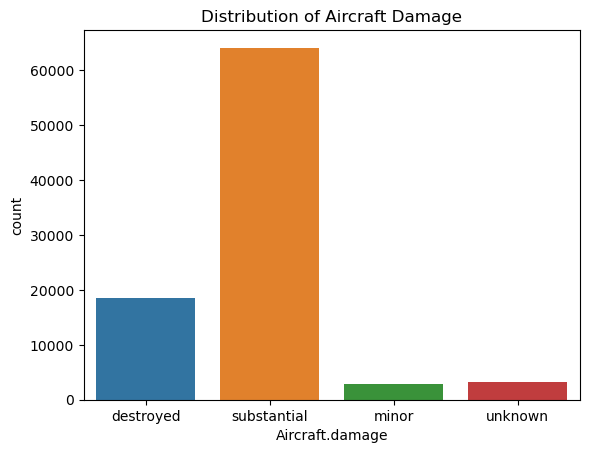

In [59]:
# Distribution of aircraft damage
sns.countplot(data=df, x='Aircraft.damage')
plt.title('Distribution of Aircraft Damage')
plt.show()


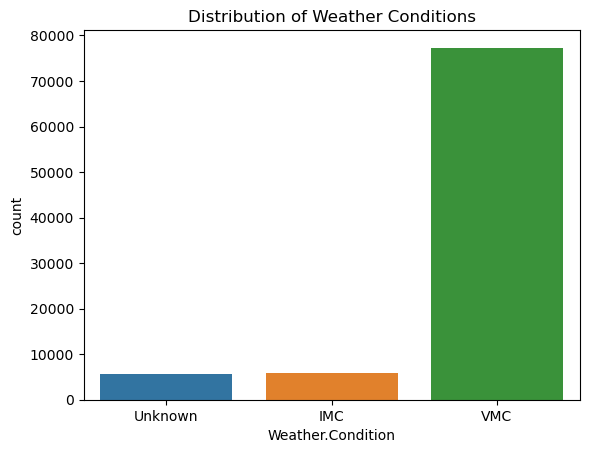

In [62]:
# Distribution of weather conditions
sns.countplot(data=df, x='Weather.Condition')
plt.title('Distribution of Weather Conditions')
plt.show()